In [91]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import duckdb

In [92]:
folderLoc="queries/batch1"
resultLoc="queries/batch1/queries10000_80.txt"
nbQ=10000

In [93]:
data = pd.read_csv('../adult/discrete.csv')
columns = [col for col in data]
columns.pop(0)
size = len(data[columns[0]])

In [94]:
folderLoc="queries/batch1"

In [95]:
fileLocs=os.listdir(folderLoc + '/temp')
fileLocs.sort()
print(fileLocs)

['00-10.txt', '10-20.txt', '20-30.txt', '30-40.txt', '40-50.txt', '50-60.txt', '60-70.txt', '70-80.txt', '80-90.txt', '90-100.txt']


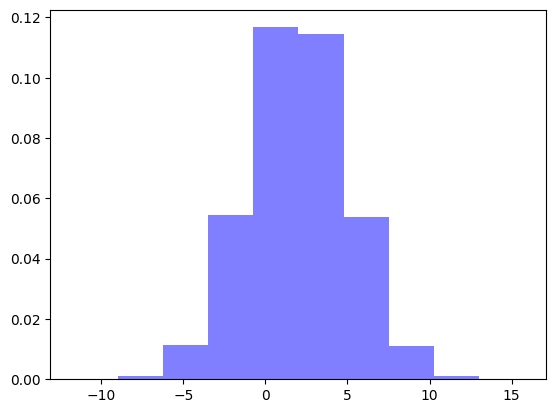

15.751837425769864
-11.722959545461578


In [96]:
sizes=[0 for i in range(10)]
dist = np.random.normal(8, 3, 100000)

plt.hist(dist, 10,
         density=True,
         histtype='bar',
         facecolor='b',
         alpha=0.5)

plt.show()

max = np.max(dist)
min = np.min(dist)
print(max)
print(min)

max = 10
min = 0


In [97]:
for i in dist:
    if len(sizes) >= nbQ:
        break
    nb = i * 10 / (max - min)
    if nb < 0:
        continue
    elif nb >= 10:
        continue
    else:
        index = int(nb)
    sizes[index] += 1

print(sizes)

[11763, 13042, 12932, 11396, 9308, 6891, 4384, 2598, 1276, 574]


In [98]:
exprs = []
for indexFile in range(10):
    with open(folderLoc + '/temp/' + fileLocs[indexFile]) as file_in:
        i=0
        for line in file_in:
            exprs.append(line)
            i += 1
            if i == sizes[indexFile]:
                break

print(len(exprs))

73749


In [99]:
with open(resultLoc, 'a') as f:
    for expr in exprs:
        f.write(expr)